In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"D:\vs code all codes\ML projects\Email_spam_classifier\spam.csv", encoding='latin1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3341,ham,You will go to walmart. I.ll stay.,NaN,NaN,NaN
2689,ham,"Ya ok, vikky vl c witin &lt;#&gt; mins and il...",NaN,NaN,NaN
4983,spam,goldviking (29/M) is inviting you to be his fr...,NaN,NaN,NaN
3600,ham,"Jay told me already, will do",NaN,NaN,NaN
5406,ham,Dear are you angry i was busy dear,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
#data cleaning
# eda
# text preprocessing
# model building
# evaluation
# improvements
# website
# deploy

## Data cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last 3 columns

df.drop(columns=list(df.iloc[:,2:].columns),inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1514,ham,K:)all the best:)congrats...
3610,ham,No. I.ll meet you in the library
707,ham,Quite late lar... Ard 12 anyway i wun b drivin...
5316,ham,Jus finish watching tv... U?
2522,ham,Dunno lei... I might b eatin wif my frens... I...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

## EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

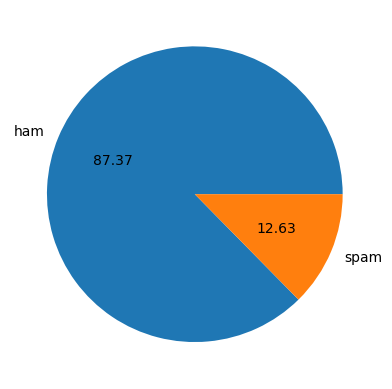

In [19]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
# Data is imbalance

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksaii\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


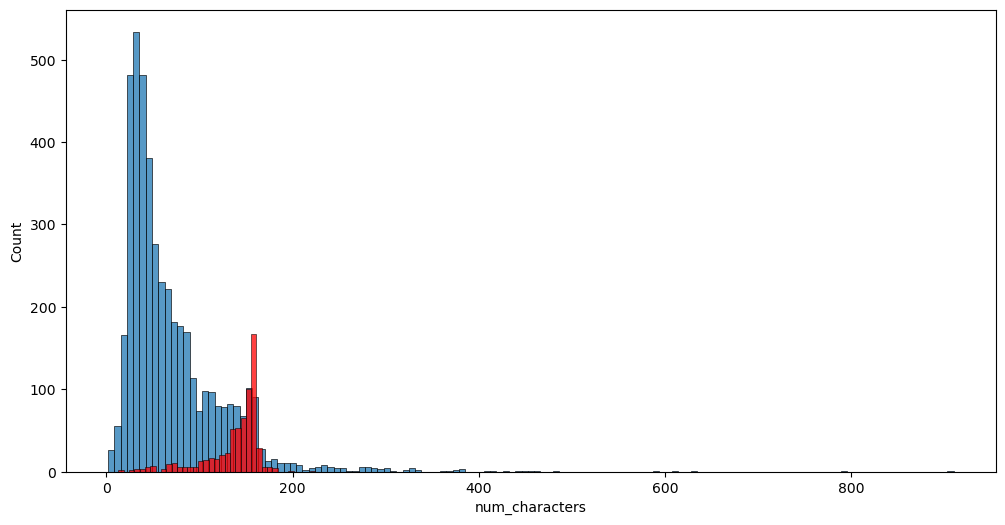

In [29]:
# histogram
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

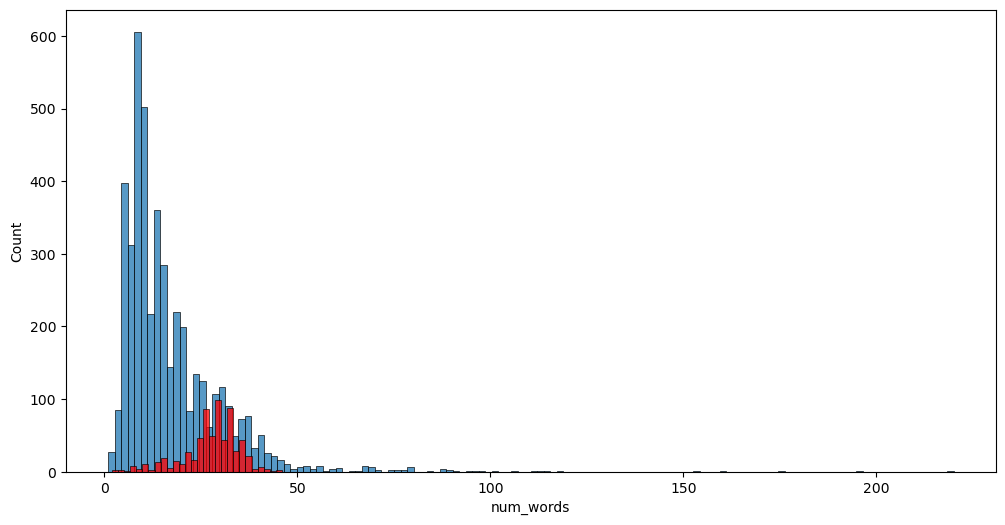

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')
plt.show()

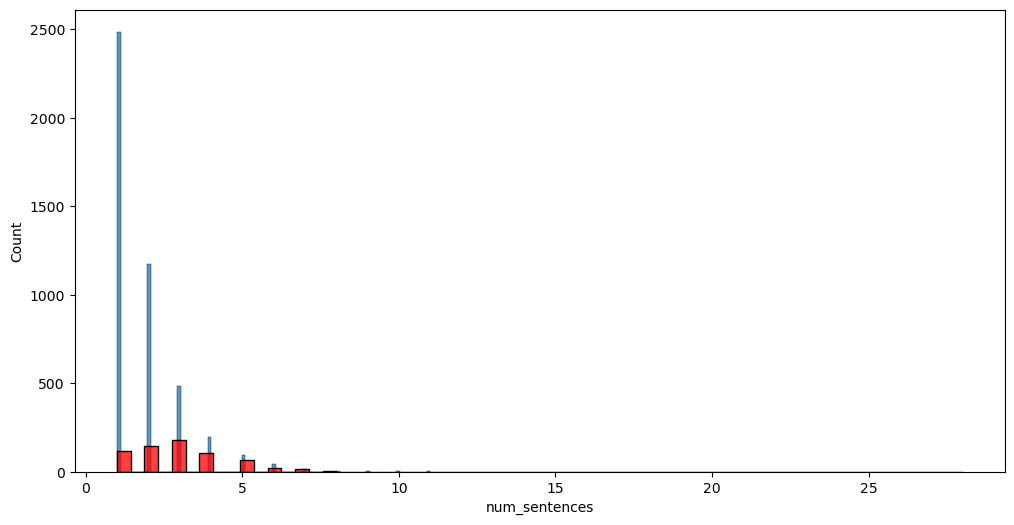

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')
plt.show()

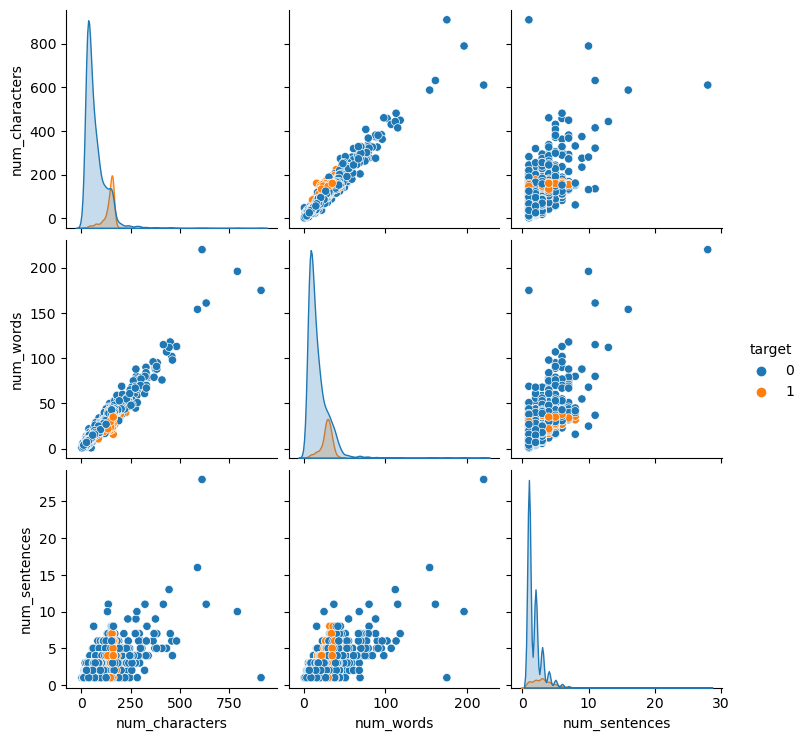

In [32]:
sns.pairplot(df,hue='target')

<Axes: >

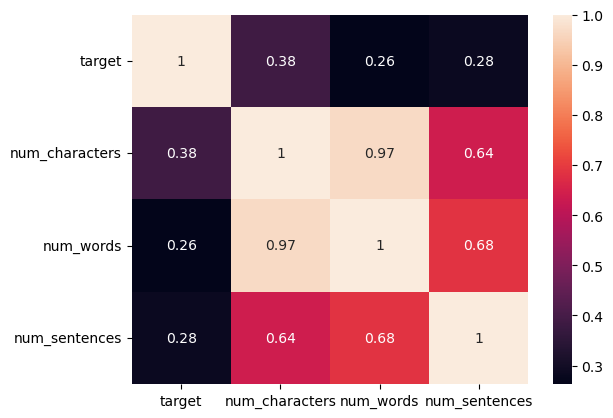

In [33]:
sns.heatmap(df.drop(columns=['text']).corr(),annot=True)

## Data Preprocessing

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksaii\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def transform_text(text):

    text = text.lower()

    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    test=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)



In [36]:
transform_text(df['text'][10])

"'m gon na home soon n't want talk stuff anymor tonight k 've cri enough today"

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
ham_wc =  wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

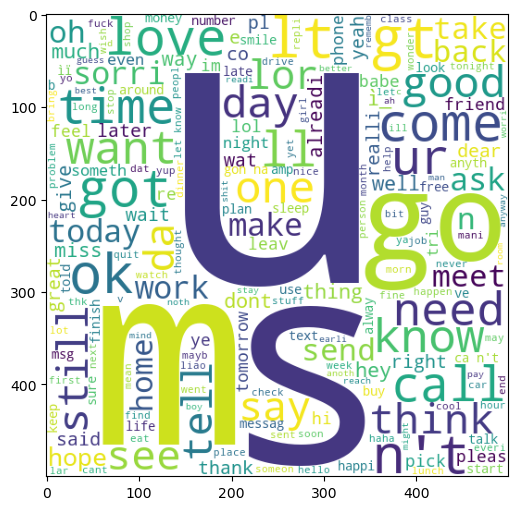

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

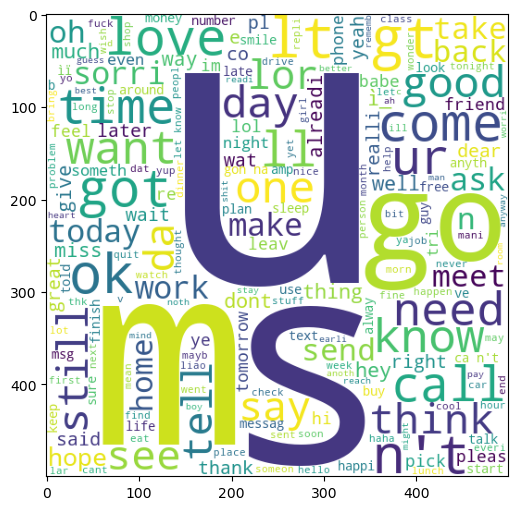

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [42]:
df[df['target'] == 1]['transformed_text'].tolist()

["free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question std txt rate c 's appli 08452810075over18 's",
 "freemsg hey darl 's 3 week 's word back 'd like fun still tb ok xxx std chg send å£1.50 rcv",
 'winner valu network custom select receivea å£900 prize reward claim call 09061701461. claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 20,000 pound txt csh11 send 87575. cost 150p/day 6day 16+ tsandc appli repli hl 4 info',
 'urgent 1 week free membership å£100,000 prize jackpot txt word claim 81010 c www.dbuk.net lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http //wap xxxmobilemovieclub.com n=qjkgighjjgcbl',
 'england v macedonia dont miss goals/team news txt ur nation team 87077 eg england 87077 tri wale scotland 4txt/ì¼1.20 poboxox36504w45wq 16+',
 'thank subscript rington uk mob

In [43]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [63]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 "'s",
 'appli',
 '08452810075over18',
 "'s",
 'freemsg',
 'hey',
 'darl',
 "'s",
 '3',
 'week',
 "'s",
 'word',
 'back',
 "'d",
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'å£1.50',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461.',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 '20,000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575.',
 'cost',
 '150p/day',
 '6day',
 '16+',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'w

In [44]:
len(spam_corpus)

11083

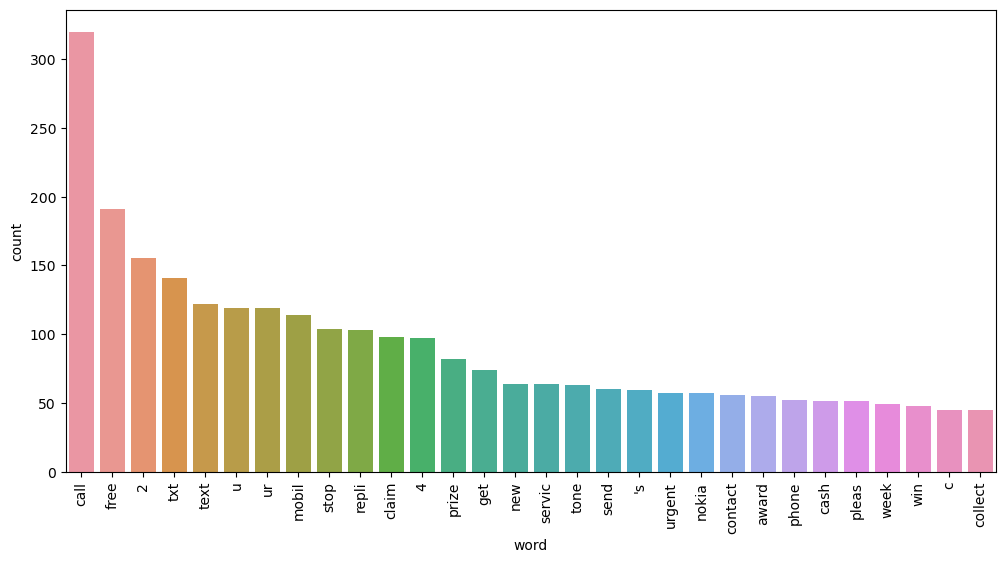

In [45]:
from collections import Counter

# Get the 30 most common words and their counts
most_common = Counter(spam_corpus).most_common(30)
df_common = pd.DataFrame(most_common, columns=['word', 'count'])

plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_common)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
df[df['target']==0]['transformed_text'].tolist()

['go jurong point crazi .. avail bugi n great world la e buffet ... cine got amor wat ...',
 'ok lar ... joke wif u oni ...',
 'u dun say earli hor ... u c alreadi say ...',
 "nah n't think goe usf live around though",
 'even brother like speak treat like aid patent',
 "per request 'mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun",
 "'m gon na home soon n't want talk stuff anymor tonight k 've cri enough today",
 "'ve search right word thank breather promis wont take help grant fulfil promis wonder bless time",
 'date sunday',
 "oh k ... 'm watch",
 'eh u rememb 2 spell name ... ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'i\x89û÷m go tri 2 month ha ha joke',
 'ì_ pay first lar ... da stock comin ...',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 "forc eat slice 'm realli hungri tho suck mark get worri know 'm sick turn pi

In [47]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [64]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 '..',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'cine',
 'got',
 'amor',
 'wat',
 '...',
 'ok',
 'lar',
 '...',
 'joke',
 'wif',
 'u',
 'oni',
 '...',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 '...',
 'u',
 'c',
 'alreadi',
 'say',
 '...',
 'nah',
 "n't",
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 "'mell",
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 "'m",
 'gon',
 'na',
 'home',
 'soon',
 "n't",
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 "'ve",
 'cri',
 'enough',
 'today',
 "'ve",
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 '...',
 "'m",
 'watch',
 '

In [48]:
len(ham_corpus)

39897

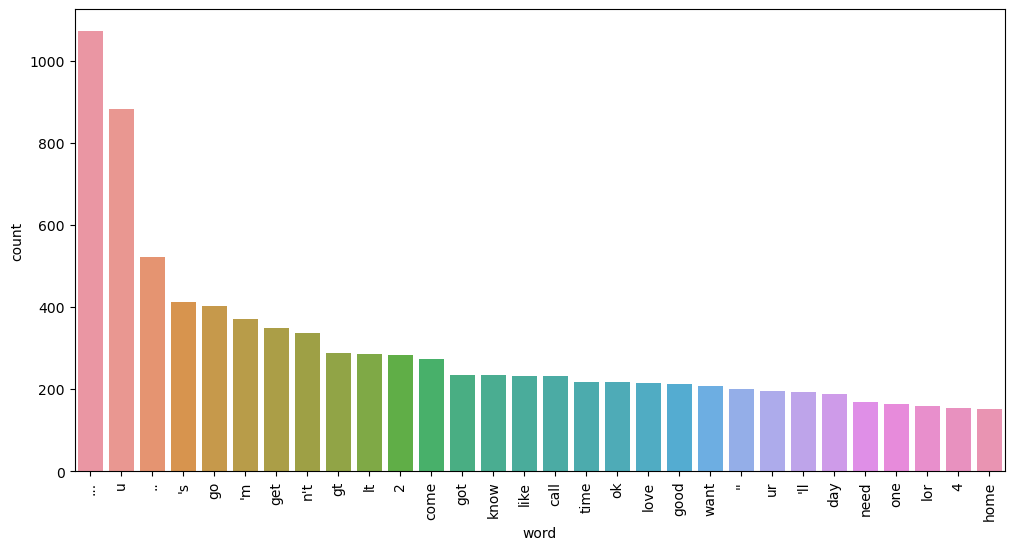

In [49]:
# Get the 30 most common words and their counts
most_common = Counter(ham_corpus).most_common(30)
df_common = pd.DataFrame(most_common, columns=['word', 'count'])

plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=df_common)
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [50]:
# text vectorization
# using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [52]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
x.shape

(5169, 3000)

In [54]:
y = df['target'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [59]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.879110251450677
[[790 106]
 [ 19 119]]
0.5288888888888889


In [60]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [61]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864603481624759
[[896   0]
 [ 14 124]]
1.0


In [62]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))